<a href="https://testpolly.elucidata.io/manage/workspaces?action=open_polly_notebook&source=github&path=path_place_holder&kernel=elucidata/Python 3.10&machine=medium" target="_parent"><img src="https://elucidatainc.github.io/PublicAssets/open_polly.svg" alt="Open in Polly"/></a>


# Welcome to Polly Python3 Notebook.

# Validation Ingestion Integration

### What is Validation Ingestion Integration ?

- Validation library developed by Data Products team has been integrated in poll-py.
- Users can run validation for dataset level or sample level metadata **before ingestion**.
- This can enable users to ensure data quality before the ingestion is being done.


- Right now in polly py dataset level validation has been integrated. In future sample level validation will also be integrated.

### Flow 
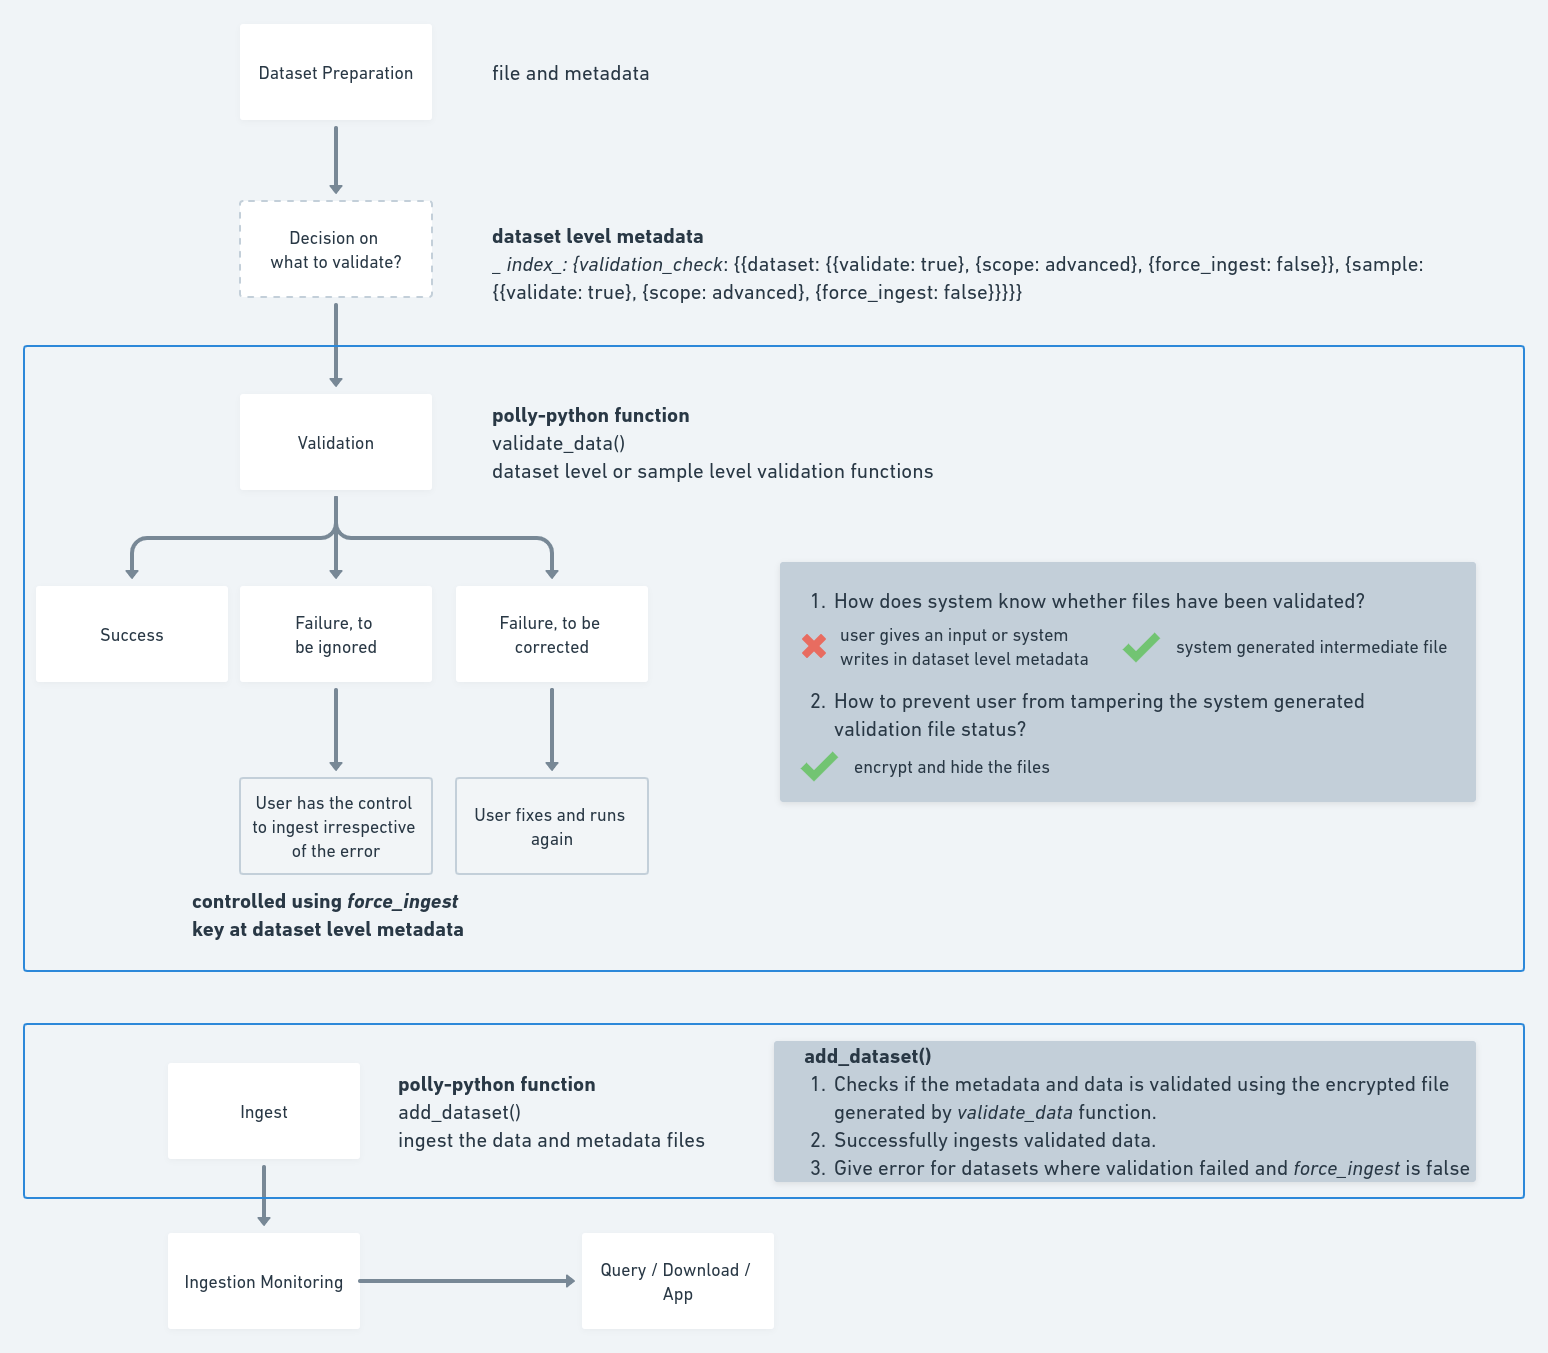

### Step 1 -> Install the library and load relevant classes


In [2]:
!sudo pip3 install https://elucidatainc.github.io/PublicAssets/builds/polly-python/polly_python-0.3.2-py3-none-any.whl        

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
     |████████████████████████████████| 128 kB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 22.3 MB/s eta 0:00:01
     |████████████████████████████████| 10.9 MB 77.7 MB/s eta 0:00:01
     |████████████████████████████████| 135 kB 66.8 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 16.9 MB/s eta 0:00:01


  Attempting uninstall: botocore
    Found existing installation: botocore 1.24.19
    Uninstalling botocore-1.24.19:
      Successfully uninstalled botocore-1.24.19
  Attempting uninstall: s3transfer
    Found existing installation: s3transfer 0.5.2
    Uninstalling s3transfer-0.5.2:
      Successfully uninstalled s3transfer-0.5.2
  Attempting uninstall: cryptography
    Found existing installation: cryptography 40.0.2
    Uninstalling cryptography-40.0.2:
      Successfully uninstalled cryptography-40.0.2
  Attempting uninstall: boto3
    Found existing installation: boto3 1.21.19
    Uninstalling boto3-1.21.19:
      Successfully uninstalled boto3-1.21.19
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.22.74 requires botocore==1.24.19, but you have botocore 1.29.153 which is incompatible.
awscli 1.22.74 requires s3transfer<0.6.0,>=0.5.0, but you hav

In [1]:
import os
from polly.auth import Polly
from polly.validation import Validation
from polly.omixatlas import OmixAtlas

AUTH_TOKEN=(os.environ['POLLY_REFRESH_TOKEN']) # Obtain authentication tokens
Polly.auth(AUTH_TOKEN)

validation = Validation()
omixatlas = OmixAtlas()

Retrieving ontological names...


/usr/local/lib/python3.10/site-packages/polly_validator/downloader/get_valid_names.py:46: UnicodeWarning: unsound encoding, assuming utf-8 (99% confidence)
  diseases = pt.Ontology(f'https://raw.githubusercontent.com/bioinfo-el/ontologies/'


Getting predefined values for Data Type and Data Source...
Retrieved Valid Data Types
Retrieved Valid Data Sources


### Step 2 -> Load Data

In [2]:
# loading batch_1 metadata

!polly files sync -s "polly://batch_1/metadata/" -d "batch_1/metadata/" -y

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Success: Installed optional packages!
Refreshing session...
Session refreshed!
Completed 12.4 KiB/14.0 KiB (16.0 KiB/s) with 2 file(s) remainingCompleted 14.0 KiB/14.0 KiB (17.0 KiB/s) with 1 file(s) remainingSync complete!


In [3]:
# loading batch_1 data

!polly files sync -s "polly://batch_1/data/" -d "batch_1/data/" -y

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Completed 120.4 MiB/120.4 MiB (64.8 MiB/s) with 1 file(s) remainingmainingted 45.2 MiB/120.4 MiB (35.1 MiB/s) with 2 file(s) remaining  Completed 52.8 MiB/120.4 MiB (39.4 MiB/s) with 2 file(s) remaining  Completed 90.2 MiB/120.4 MiB (54.8 MiB/s) with 1 file(s) remainingCompleted 109.7 MiB/120.4 MiB (60.9 MiB/s) with 1 file(s) remainingSync complete!


### Step 3 -> Fetch Ingestion Configs

- Ingestion configs consist of both indexing configs and validation configs.
- Indexing configs gives control on indexing of file.
- Validation configs gives control on validation of file.

In [4]:
import pprint

ingestion_configs = validation.get_ingestion_configs()
print("---ingestion configs----")
pprint.pprint(ingestion_configs)

---ingestion configs----
{'col_metadata': True,
 'data_required': True,
 'file_metadata': True,
 'row_metadata': True,
 'validation_check': {'dataset': {'force_ingest': False,
                                  'scope': 'advanced',
                                  'validate': True},
                      'sample': {'force_ingest': False,
                                 'scope': 'advanced',
                                 'validate': True}}}


- Validating batch_1 data with default validation configs.
- By default in `validation_configs`, `validate` is set to True.
- Also scope is defined as `advanced`, here by default, can be changed to `basic` for further validaton
- In all the files of batch_1, this validation_configs will be inserted which will be then used by the system to determine nature of validation and execute tasks accordingly

### Step 4 -> Put the ingestion configs in the metadata json

In [5]:
# step 4.1 -> define folder paths and `files to be excluded`
# folder_paths structure is same as we have for ingestion functions so similar kind of UX

## data folder path -> containing all the data files of batch_1
source_folder_path_data = "/import/batch_1/data"

## metadata folder path -> containing all the metadata files of batch_1
source_folder_metadata = "/import/batch_1/metadata"

source_folder_path = {"data":source_folder_path_data, "metadata":source_folder_metadata}
source_folder_path_metadata = source_folder_path["metadata"]
VALIDATION_STATUS_FILE_NAME = "validation_status.txt"



import os
from pathlib import Path

# step 4.2 -> create list of metadata files to be edited
metadata_directory = os.fsencode(source_folder_path_metadata)
metadata_file_list = []
for file in os.listdir(metadata_directory):
    file = file.decode("utf-8")
    # skip hidden files
    # skip the validation_status.txt if created
    # in the metadata folder
    if not file.startswith(".") and file != VALIDATION_STATUS_FILE_NAME:
        metadata_file_list.append(file)

        

        
# step 4.3 -> load the file and add the ingestion_configs
for file in metadata_file_list:
    file_path = str(Path(source_folder_path_metadata) / Path(os.fsdecode(file)))
    # read data from file
    with open(file_path, "r") as metadata_file:
        metadata_file_dict = json.load(metadata_file)
        # ingest the indexing configs in the `__index__`
        # `__index__` is at the top level of the metadata dict
        metadata_file_dict["__index__"] = ingestion_configs
    
    # write data to file
    with open(file_path, "w") as metadata_file:
        json.dump(metadata_file_dict, metadata_file, indent=4)


import pprint
# read the file again to check if ingestion_configs added
for file in metadata_file_list:
    file_path = str(Path(source_folder_path_metadata) / Path(os.fsdecode(file)))

    with open(file_path, "r") as metadata_file:
        metadata_file_dict_edited = json.load(metadata_file)
        print(f"----edited file dict of file: {file}")
        print("\n")
        pprint.pprint(metadata_file_dict_edited, sort_dicts=False)
    
    print("\n")

----edited file dict of file: GSE95640_GPL11154.json


{'dataset_id': 'GSE95640_GPL11154',
 'data_type': 'transcriptomics',
 'dataset_source': 'geo',
 'curation_version': 'g3',
 'total_num_samples': '380',
 'publication': 'https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE95640',
 'platform': 'RNAseq',
 'processing': 'connector',
 'connector_version': 'geo_rnaseq_nf_v0.0.5',
 'data_matrix_available': 'true',
 'ref_gene_annotations': 'Ensembl release V107',
 'alignment_method': 'kallisto',
 'reference_genome': 'GRCh38',
 'description': 'Transcriptome profiling from adipose tissue during '
                'low-caloric diet reveals predictors of long-term weight and '
                'glycemic outcomes in obese, non-diabetic subjects',
 'summary': 'Background: Low-caloric diet (LCD) reduces fat mass excess, '
            'improves insulin sensitivity, and alters adipose tissue (AT) gene '
            'expression. Yet the relationship with long-term clinical outcomes '
            'rem

### Step 5 - Doing Dataset Level Validation and Ingestion

- Demo is shown on a dummy repo lib_repo_dev on testpolly
- `validate_datasets` function take 3 parameters
    - repo_id -> repo_id of the OmixAtlas
    - source_folder_path -> dict containing data and metadata paths `source_folder_path = {"data":source_folder_path_data, "metadata":source_folder_metadata}`
    - schema_config(Optional parameter) -> In case there are multiple source and datatypes in the schema. User needs pass for which source and datatype, the input data needs to be validated on.
    
- In the batch_1 data, validation is being done with by default validation_configs
    - `validate` key set to `True` for all files. All files in batch_1 will go through validation
    - `scope` key set to `advanced` for all files.
    - `force_ingest` is set to `false`, which means that if files fail validation, do not force_ingest it. Let it get skipped.

In [6]:
# lib_repo_dev(dummy repo) repo on testpolly

repo_id = 1673847977346
error_df, status_dict = validation.validate_datasets(repo_id, source_folder_path)

# gives all the errors present in the df


print("\n")

# gives the status of each where validate is set to True
# whether it has passed or failed validation
print("-----status dict-----")
pprint.pprint(status_dict)

Combining Metadata Files for Validation: 100%|██████████| 2/2 [00:00<00:00, 1920.03it/s]


--validate_val: True
--validate_val: True
╒════╤═══════════════════╤═══════════════════════════╤═══════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════╕
│    │ dataset_id        │ Field                     │ Original Name         │ Error Message                                                                                      │          Repo │
╞════╪═══════════════════╪═══════════════════════════╪═══════════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════╡
│  0 │ GSE95640_GPL11154 │ total_num_samples         │ total_num_samples     │ value is not a valid integer                                                                       │ 1673847977346 │
├────┼───────────────────┼───────────────────────────┼───────────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────

Generating Status File of Validation: 100%|██████████| 2/2 [00:00<00:00, 2704.26it/s]




-----status dict-----
{'GSE76311_GPL17586': False, 'GSE95640_GPL11154': False}


- 2 metadata files -> validated
- After validation is run, `validation_status.txt` files gets created inside the `metadata folder`. This file consists of a encrypted hash which has status of the validated files, whether they have passed or failed validation. 

- This `validation_status.txt` is used by the ingestion function to check status of files before ingesting. The files failed validation will be skipped.

- All the errors are listed in the error_df for both the files.


- As it is a demo, directly ingesting files after validation not correcting errors, just going ahead to ingest

In [11]:
# ingesting the files using add dataset

# optional paramter
destionation_folder_path = "transcriptomics_610"

res_upload_df = omixatlas.add_datasets(repo_id, source_folder_path, destionation_folder_path, validation=True)
print("----res upload df-----")
print(res_upload_df)

Uploading data files: 0files [00:00, ?files/s]

Please wait for 30 seconds while your ingestion request is getting logged.




Your request is successfully logged. You can go to ingestion monitoring dashboard for tracking it's status.

 Empty DataFrame
Columns: [File Name, Message]
Index: []


-----Files which are Not Validated-------
   Invalid Metadata Files
0  GSE95640_GPL11154.json
1  GSE76311_GPL17586.json


      Invalid Data Files
0  GSE95640_GPL11154.gct
1  GSE76311_GPL17586.gct

Destination folder path considered for ingestion request: transcriptomics_610
----res upload df-----
Empty DataFrame
Columns: [File Name, Message]
Index: []


In [16]:
# ingesting the files using add dataset without validation

# optional paramter
destionation_folder_path = "transcriptomics_610"


res_upload_df = omixatlas.add_datasets(repo_id, source_folder_path, destionation_folder_path, validation=False)
print("----res upload df-----")
print(res_upload_df)

Uploading data files: 100%|██████████| 2/2 [00:01<00:00,  1.10files/s]


Please wait for 30 seconds while your ingestion request is getting logged.


Your request is successfully logged. You can go to ingestion monitoring dashboard for tracking it's status.

                 File Name        Message
0  combined_metadata.json  File Uploaded
1   GSE76311_GPL17586.gct  File Uploaded
2   GSE95640_GPL11154.gct  File Uploaded

Destination folder path considered for ingestion request: transcriptomics_610
----res upload df-----
                File Name        Message
0  combined_metadata.json  File Uploaded
1   GSE76311_GPL17586.gct  File Uploaded
2   GSE95640_GPL11154.gct  File Uploaded
